# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [2]:
online_rt = pd.read_csv("C:/Users/SHRUTI/Desktop/Business Analytics material/Case Studies/Python Case Studies/2. Pandas Basic Exercises/Exercise Data Files/Pandas Exercise Online Retail files/Online_Retail.csv", engine='python')

### Step 3. Assign it to a variable called online_rt

In [3]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

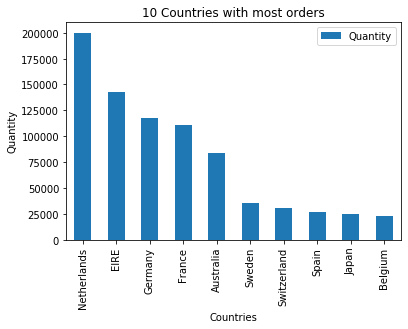

In [4]:
df1 = online_rt[['Quantity', 'Country']]
df1 = df1 [df1['Country'] != 'United Kingdom']

df_pivot = pd.pivot_table(df1, values='Quantity', 
                    columns='Country', aggfunc=np.sum).T.sort_values(by = 'Quantity', ascending = False).head(10)

df_pivot.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')
plt.show()

### Step 5.  Exclude negative Quatity entries

In [7]:
online_rt = online_rt[online_rt['Quantity'] > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

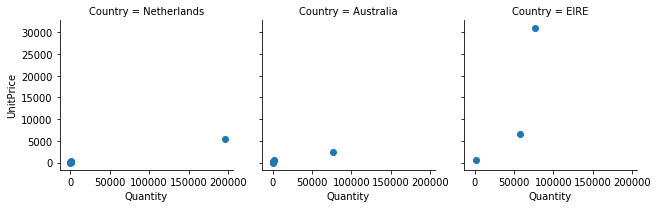

In [23]:
customers = online_rt[online_rt['UnitPrice'] > 0].groupby(['CustomerID','Country']).sum().reset_index()
customers = customers.sort_values(by = 'Quantity', ascending = False)
top3_countries = customers.head(3)

customers = customers[customers['Country'].isin (top3_countries['Country'])]

g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice")
g.add_legend()